 MOVIE RATING PREDICTION 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [13]:
df = pd.read_csv(r"C:\Users\amogh\Downloads\MY_DAILY_WORK INERNSHIP\TASK 3\movie\movie.csv", encoding='ISO-8859-1')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [23]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [59]:
df.columns

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Actor 3',
       'Genre_Action, Adventure', 'Genre_Action, Adventure, Biography',
       'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Crime',
       ...
       'Actor 2_Zayed Khan', 'Actor 2_Zeba Bakhtiar', 'Actor 2_Zeenat Aman',
       'Actor 2_Zeeshan Khan', 'Actor 2_Zhangke Jia', 'Actor 2_Zoa Morani',
       'Actor 2_Zoya Afroz', 'Actor 2_Zoya Hussain', 'Actor 2_Zubeida',
       'Actor 2_Zuber K. Khan'],
      dtype='object', length=7090)

In [27]:
df=df.dropna()

In [29]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [61]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [63]:
df

,Name,Year,Duration,Rating,Votes,Actor 3,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Actor 2_Zayed Khan,Actor 2_Zeba Bakhtiar,Actor 2_Zeenat Aman,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zoa Morani,Actor 2_Zoya Afroz,Actor 2_Zoya Hussain,Actor 2_Zubeida,Actor 2_Zuber K. Khan
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,7.0,8,Arvind Jangid,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,(2019),110 min,4.4,35,Siddhant Kapoor,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,(1997),147 min,4.7,827,Shammi Kapoor,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,(2005),142 min,7.4,"1,086",Yashpal Sharma,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,(2012),82 min,5.6,326,Kiran Bhatia,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,6.1,408,Raaghavv Chanana,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,Zubeidaa,(2001),153 min,6.2,"1,496",Manoj Bajpayee,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,(1989),125 min,5.8,44,Rajinikanth,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,(1999),129 min,4.5,655,Aruna Irani,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
x = df_encoded.drop("Rating", axis=1)
y = df_encoded["Rating"]

In [67]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)
                                               

In [69]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [80]:
predictions = model.predict(test_x)
print("Mean Squared Error:", mean_squared_error(test_y, predictions))
print("R2 Score:", r2_score(test_y, predictions))

Mean Squared Error: 1.3776202562733477
R2 Score: 0.25604159131228055


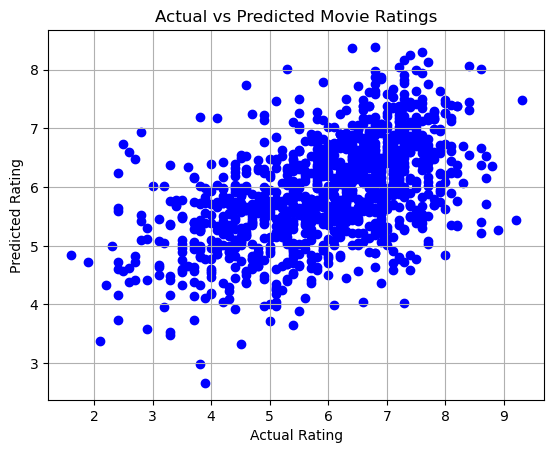

In [83]:
plt.scatter(test_y, predictions, color='blue')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()
